In [2]:
from src import model

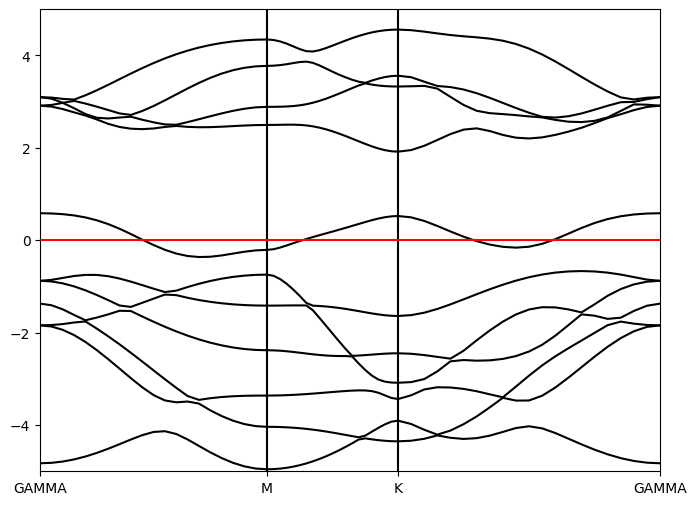

In [3]:
pw = model.pw(project_id="NbSe2")
pw.from_poscar(directory="NbSe2.poscar")
pw.ecutwfc(80)
pw.k_points(8)
pw.mixing_mode ='local-TF'
pw.smearing = 'fd'
pw.degauss = '0.01'
for calculation in ['vc-relax','relax','scf']:
    pw.set_calculation(calculation_type=calculation)
    pw.create_input()
    if calculation=='relax':
        pw.create_input(layer='mono')
    pw.calculate(num_core)
pw.set_calculation(calculation_type='bands')
points = pw.get_points()
path = ['GAMMA','M','K','GAMMA']
pw.band_points(path,points,20)
pw.create_input()
pw.calculate(num_core)
pw.set_calculation('bands-pp')
pw.create_input()
pw.calculate( )
pw.plot_electron(ylim=[-5,5],save=True)